<a href="https://colab.research.google.com/github/alf-faren/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
#Part 1

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic=pd.read_csv(url)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [254]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

In [255]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [256]:
titanic['cabin_class']=titanic['Pclass'].map({1:'first', 2:'second',3: 'third'})
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


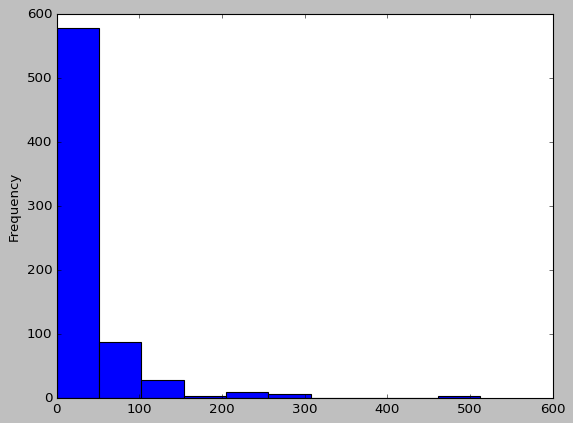

In [257]:
titanic['Fare'].plot(kind='hist');

In [258]:
print(titanic['Fare'].shape)
titanic=titanic[titanic['Fare']<500]
print(titanic['Fare'].shape)

(712,)
(709,)


In [259]:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [260]:
farelabels=['low','medium', 'high', 'vhigh']
titanic['fare_groups']=pd.cut(titanic['Fare'], bins=[0,8,15,32,264], labels=farelabels)
titanic[['Fare', 'fare_groups']].head()

,Fare,fare_groups
0,7.2500,low
1,71.2833,vhigh
2,7.9250,low
3,53.1000,vhigh
4,8.0500,medium


In [0]:
fare_results=titanic['fare_groups'].value_counts().sort_index()

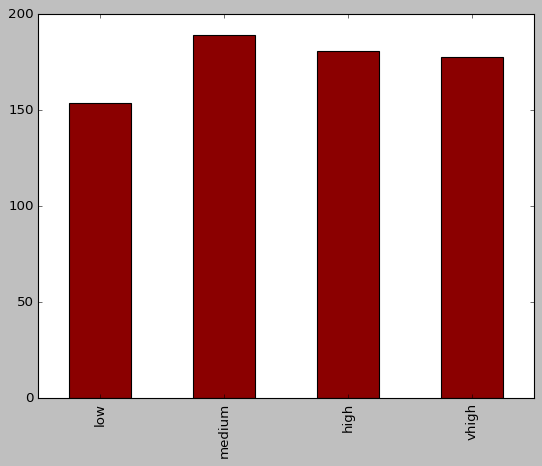

In [262]:
fare_results.plot(kind='bar', color='darkred');

In [263]:
titanic['Age'].describe()

count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

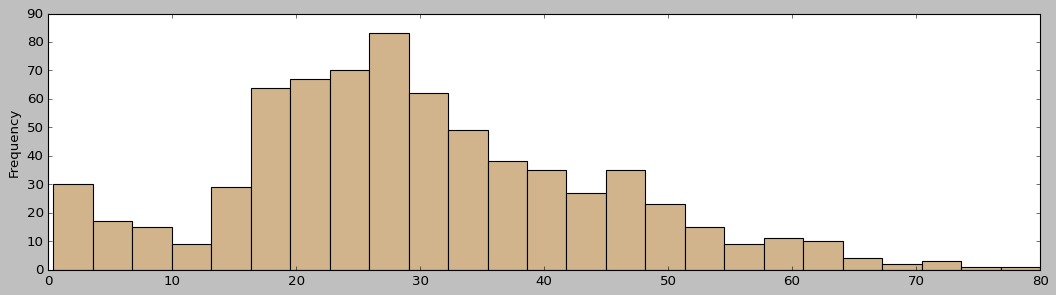

In [264]:
titanic['Age'].plot(kind='hist',
                    bins=25,
                    figsize=(16,4),
                    color='tan')

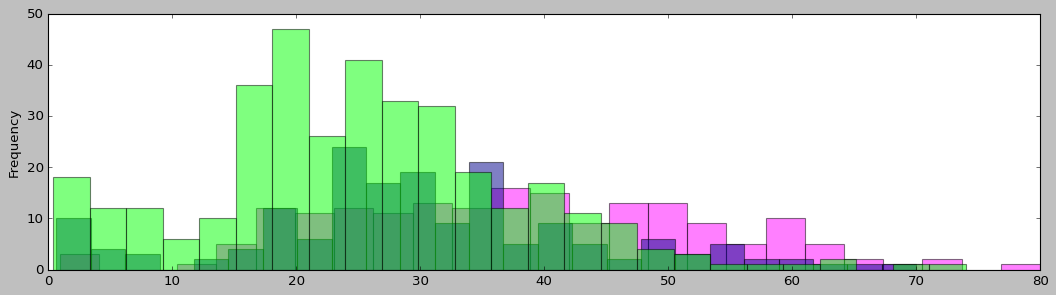

In [265]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='magenta', alpha=0.5)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='darkblue', alpha=0.5)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lime', alpha=0.5);

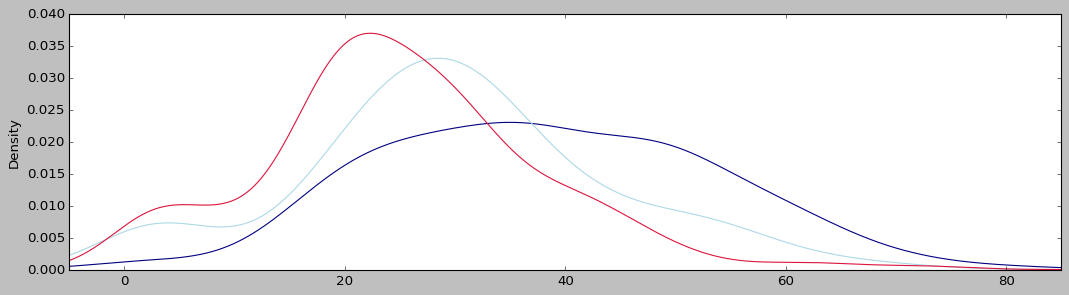

In [266]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(16,4), color='navy', xlim=(-5, 85))
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(16,4), color='lightblue', xlim=(-5, 85))
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(16,4), color='crimson', xlim=(-5, 85))

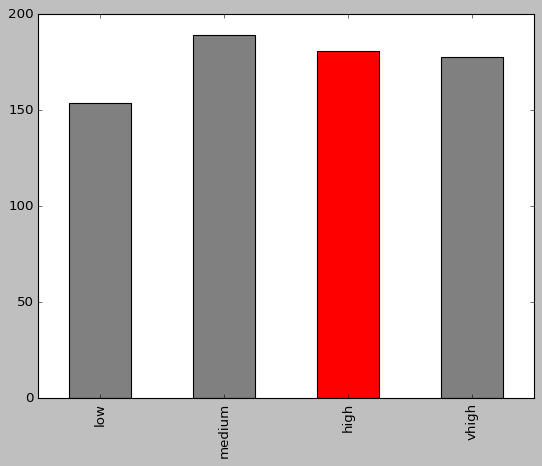

In [267]:
titanic['fare_groups'].value_counts().sort_index().plot(kind='bar', color=['grey','grey','red', 'grey'] );

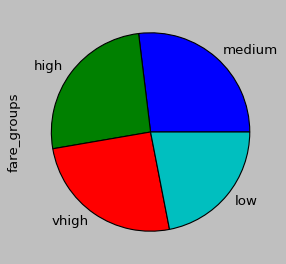

In [268]:
titanic['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [269]:
cab_death = pd.crosstab(titanic['cabin_class'],titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


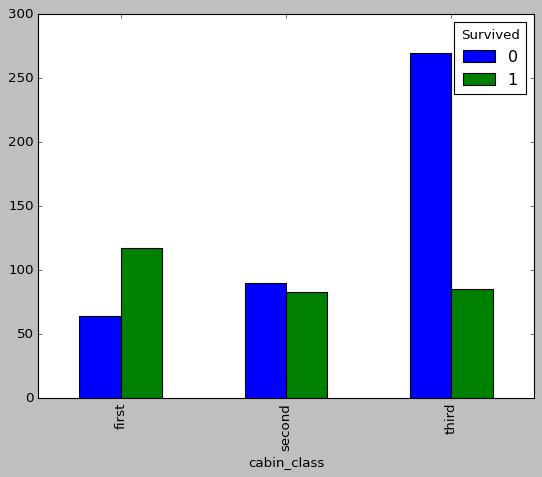

In [270]:
cab_death.plot(kind='bar');

In [271]:
cab_death2=pd.crosstab(titanic['cabin_class'],titanic['Survived'], normalize='columns')
cab_death2

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


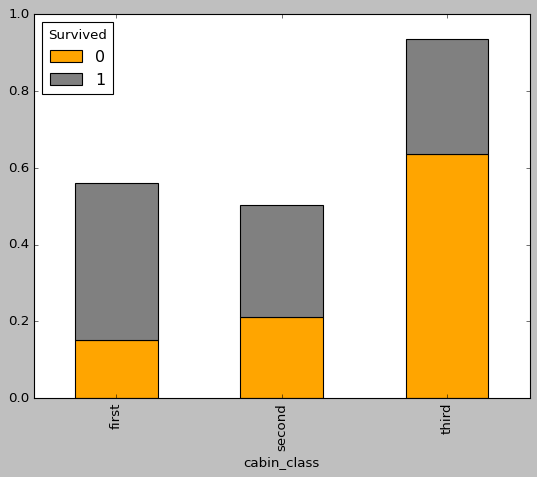

In [272]:
cab_death2.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [273]:
cab_death2 = pd.crosstab(titanic['cabin_class'],titanic['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


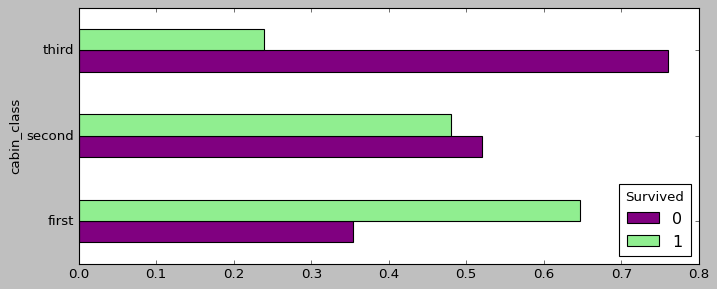

In [274]:
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [275]:
titanic['Age'].mean()

29.618011283497882

In [276]:
cab_age=titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

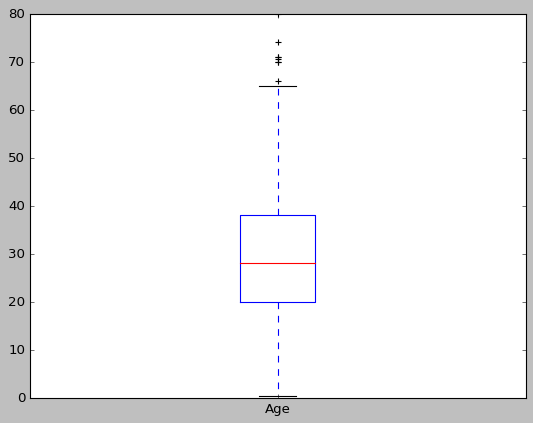

In [277]:
titanic['Age'].plot(kind='box');

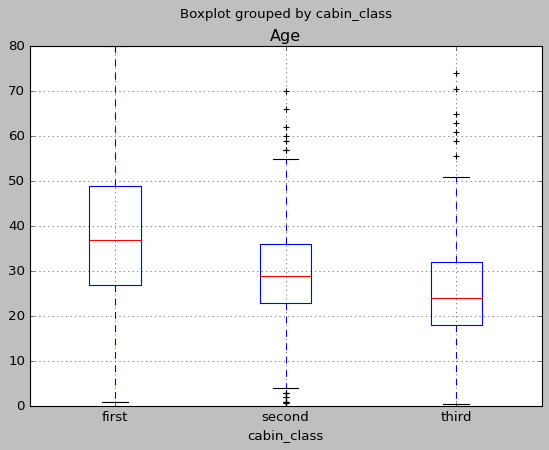

In [278]:
titanic.boxplot(column='Age', by='cabin_class');

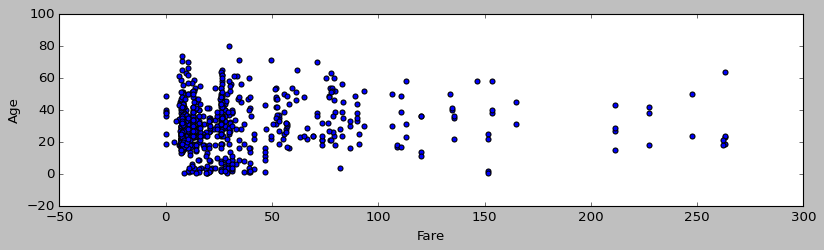

In [279]:
titanic.plot(kind='scatter',x='Fare', y='Age', figsize=(12,3));

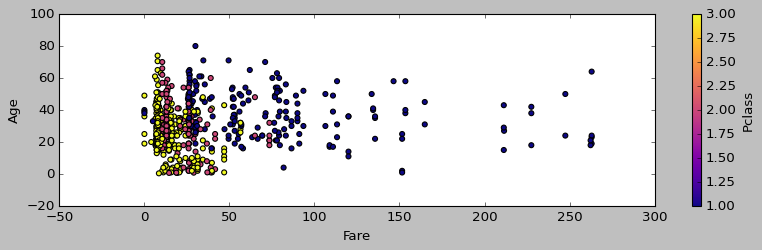

In [280]:
titanic.plot(kind='scatter',x='Fare', y='Age',c='Pclass' ,colormap='plasma', figsize=(12,3));

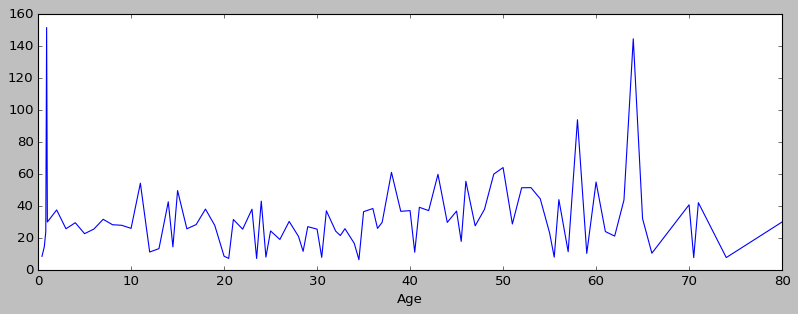

In [281]:
titanic.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

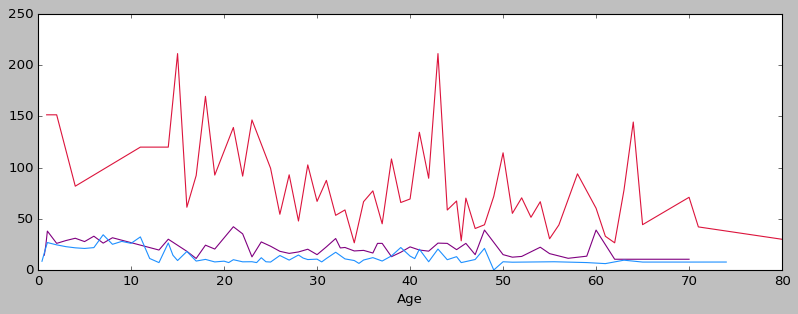

In [282]:
mycolors=['crimson', 'purple', 'dodgerblue']
for x in [1,2,3]:
  titanic[titanic['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1]);

In [283]:
titanic.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


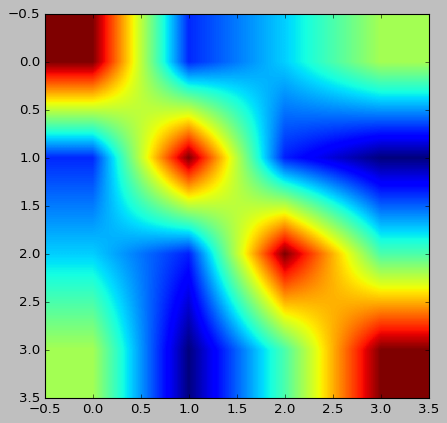

In [323]:
plt.imshow(titanic.corr());

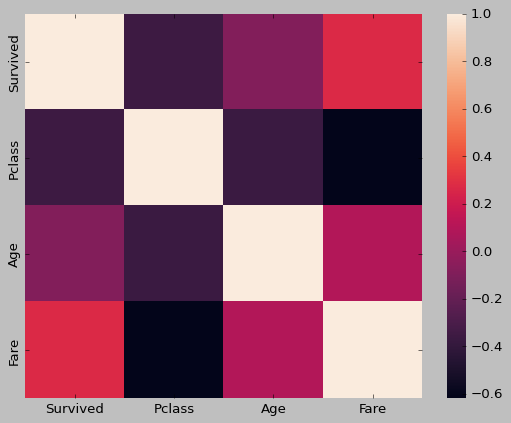

In [284]:
sns.heatmap(titanic.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


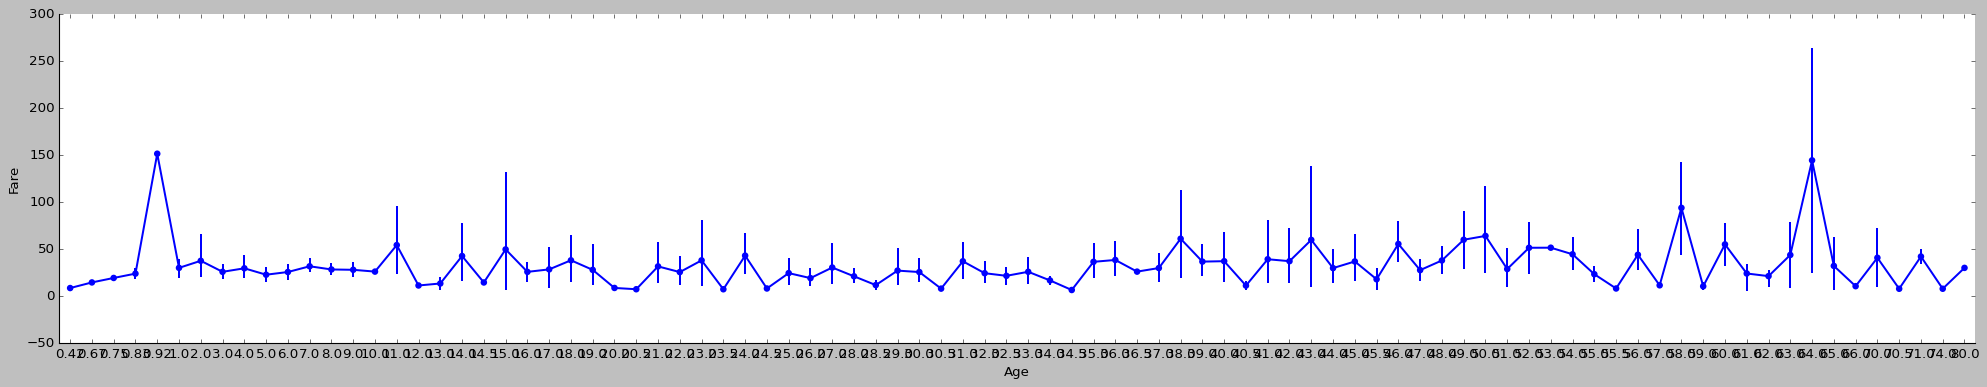

In [345]:
age_fare = sns.factorplot('Age','Fare', data=titanic, aspect=5,);

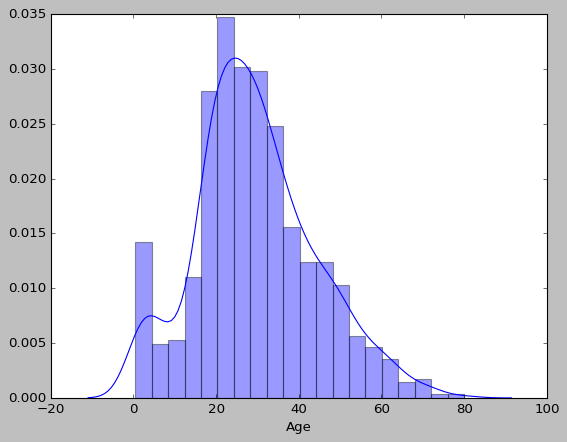

In [339]:
sns.distplot(titanic.Age.dropna())
plt.show()

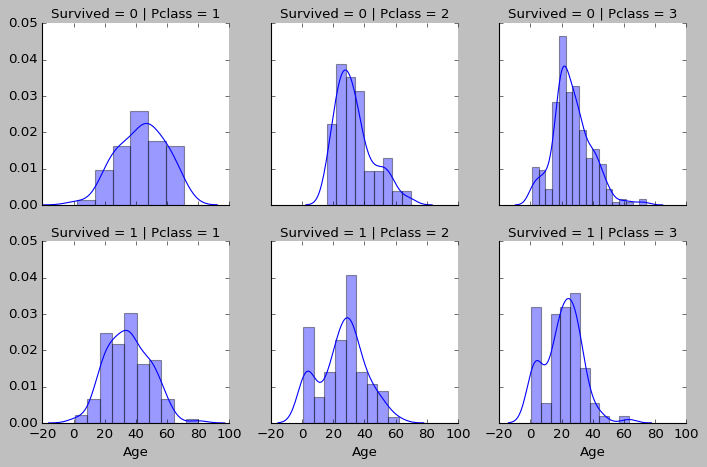

In [344]:
surv_age = sns.FacetGrid(titanic, row='Survived', col='Pclass')
surv_age.map(sns.distplot, "Age")
plt.show()

In [0]:
#Part 2 below

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [287]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
plt.style.use('classic')

In [289]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/guns-data/master/interactive_data.csv'
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
0,1,None selected,None selected,None selected,None selected,33599,316299978,10.6
1,2,None selected,None selected,None selected,White,22079,197369634,11.2
2,3,None selected,None selected,None selected,Black,7765,38896382,20.0
3,4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
4,5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


In [290]:
df.columns

Index(['Unnamed: 0', 'Intent', 'Gender', 'Age', 'Race', 'Deaths', 'Population',
       'Rate'],
      dtype='object')

In [291]:
df['Gender'].value_counts().sort_index()

Female           180
Male             180
None selected    180
Name: Gender, dtype: int64

In [292]:
df['age2']=df['Age'].map({"None selected":'0',"5":'1', "Under 15":'2', "15 - 34":'3',"35 - 64":'4',"65+":'5'})
df.sample(10)

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate,age2
230,231,Homicide,None selected,15 - 34,Black,4701,11893789,39.5,3
177,178,Suicide,Female,5,Hispanic,0,0,NaN,1
375,376,Accident,Female,15 - 34,Hispanic,2,8580577,0.0,3
384,385,Accident,Female,65+,None selected,7,25113094,0.0,5
341,342,Accident,None selected,15 - 34,Other,3,3033571,0.1,3
305,306,Homicide,Male,15 - 34,Other,54,1522171,3.5,3
59,60,None selected,Female,35 - 64,Other,16,1376239,1.2,4
381,382,Accident,Female,35 - 64,Hispanic,1,8863203,0.0,4
313,314,Homicide,Male,65+,White,145,15608050,0.9,5
392,393,Accident,Female,5,Black,0,0,NaN,1


In [293]:
df['gender2']=df['Gender'].map({"None selected":'0', "Male":'1', "Female":'2'})
df.sample(10)

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate,age2,gender2
260,261,Homicide,Female,Under 15,Black,27,4095428,0.7,2,2
345,346,Accident,None selected,35 - 64,Hispanic,12,17777422,0.1,4,0
215,216,Suicide,Male,5,Other,0,0,NaN,1,1
281,282,Homicide,Female,65+,Other,1,333879,0.3,5,2
502,503,Unknown,Female,5,Asian/Pacific Islander,0,0,NaN,1,2
409,410,Accident,Male,15 - 34,White,102,24831032,0.4,3,1
480,481,Unknown,Female,15 - 34,None selected,23,42593280,0.1,3,2
148,149,Suicide,Female,None selected,Asian/Pacific Islander,33,8589119,0.4,0,2
237,238,Homicide,None selected,35 - 64,Hispanic,514,17777422,2.9,4,0
100,101,None selected,Male,65+,Asian/Pacific Islander,26,750151,3.5,5,1


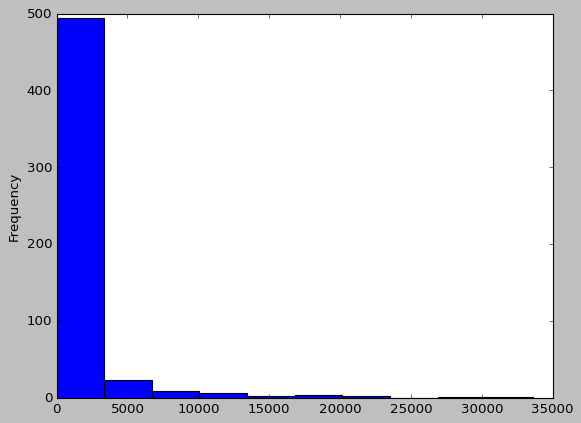

In [294]:
df['Deaths'].plot(kind='hist');

In [295]:
df['Deaths'].describe()

count      540.000000
mean       995.518519
std       3322.544944
min          0.000000
25%          1.000000
50%         22.000000
75%        191.750000
max      33599.000000
Name: Deaths, dtype: float64

In [296]:
deathlabel=['low','med','high','vhigh']
df['deathgroup']=pd.cut(df['Deaths'], bins=[250,1000,5000,20000,35000], labels=deathlabel)
df[['Deaths', 'deathgroup']].head()

,Deaths,deathgroup
0,33599,vhigh
1,22079,vhigh
2,7765,high
3,3007,med
4,442,low


In [0]:
deathresults=df['deathgroup'].value_counts().sort_index()

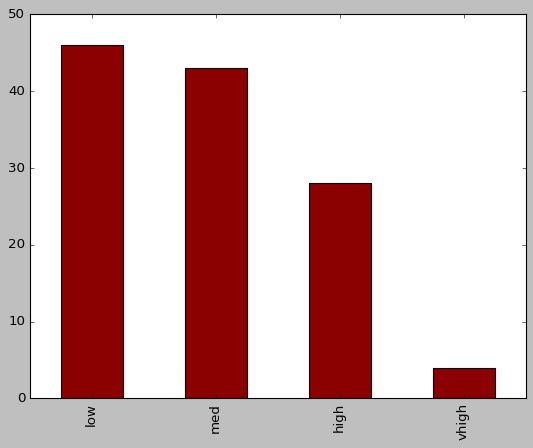

In [298]:
#bar
deathresults.plot(kind='bar', color='darkred');

In [299]:
df['Population'].describe()

count    5.400000e+02
mean     2.342963e+07
std      4.501642e+07
min      0.000000e+00
25%      1.428743e+06
50%      6.856696e+06
75%      2.490155e+07
max      3.163000e+08
Name: Population, dtype: float64

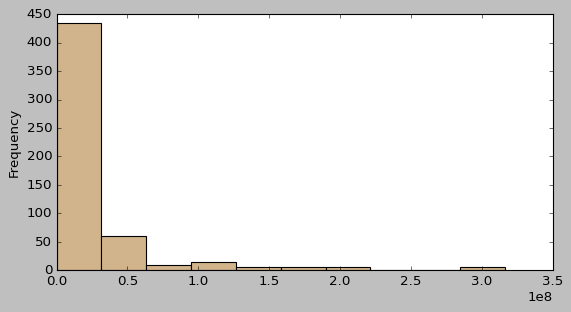

In [300]:
#histogram
df['Population'].plot(kind='hist',
                bins=10,
                figsize=(8,4),
                color='tan');

In [0]:
#changing from str to int
df['gender2']=pd.to_numeric(df['gender2'])
df['age2']=pd.to_numeric(df['age2'])

In [302]:
print(type(df['age2'][0]))

<class 'numpy.int64'>


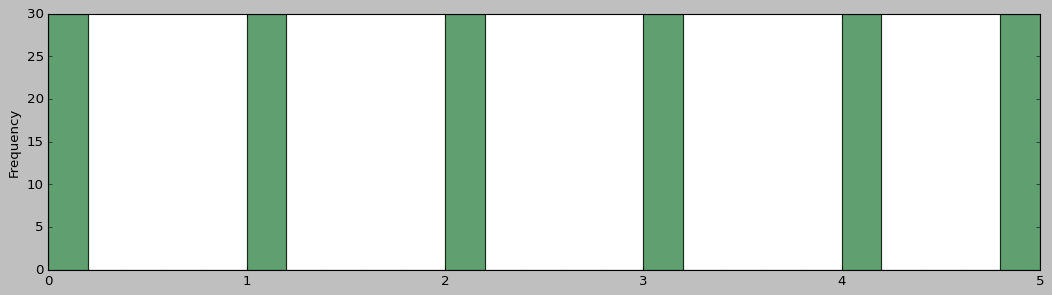

In [303]:
#due to equal spread of data, everything is merged into one bar
df[df['gender2']==0]['age2'].plot(kind='hist', bins=25, figsize=(16,4), color='darkblue', alpha=0.5)
df[df['gender2']==1]['age2'].plot(kind='hist', bins=25, figsize=(16,4), color='magenta', alpha=0.5)
df[df['gender2']==2]['age2'].plot(kind='hist', bins=25, figsize=(16,4), color='lime', alpha=0.5);


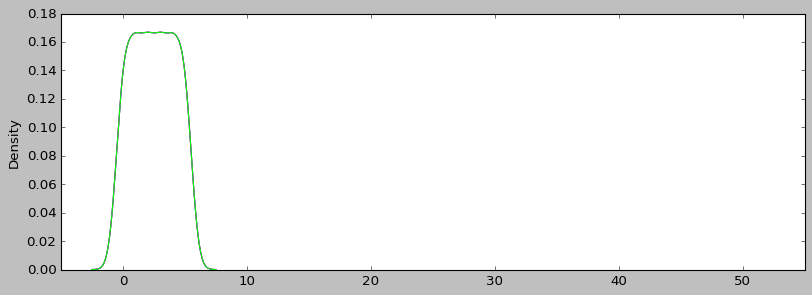

In [304]:
#density
df[df['gender2']==0]['age2'].plot(kind='density',  figsize=(12,4), color='darkblue', xlim=(-5, 35))
df[df['gender2']==1]['age2'].plot(kind='density',  figsize=(12,4), color='magenta', xlim=(-5, 95))
df[df['gender2']==2]['age2'].plot(kind='density', figsize=(12,4), color='lime', xlim=(-5, 55));

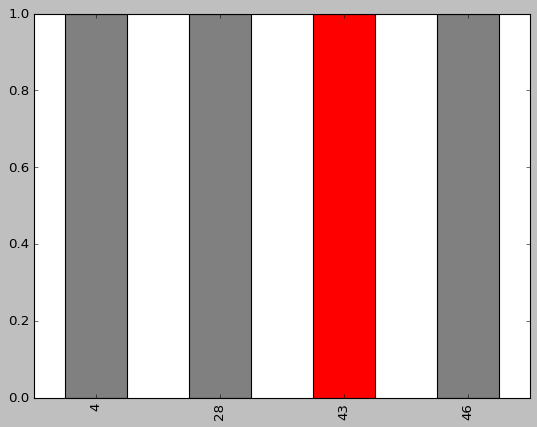

In [305]:
deathresults.value_counts().sort_index().plot(kind='bar', color=['grey','grey','red','grey']);

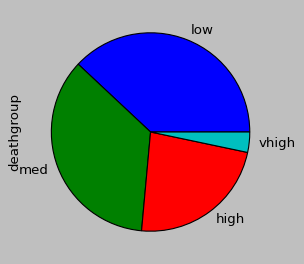

In [306]:
df['deathgroup'].value_counts().plot(kind='pie', figsize=(4,4));

In [307]:
gender_age = pd.crosstab(df['gender2'],df['Age'])
gender_age

Age,15 - 34,35 - 64,5,65+,None selected,Under 15
gender2,,,,,,
0,30,30,30,30,30,30
1,30,30,30,30,30,30
2,30,30,30,30,30,30


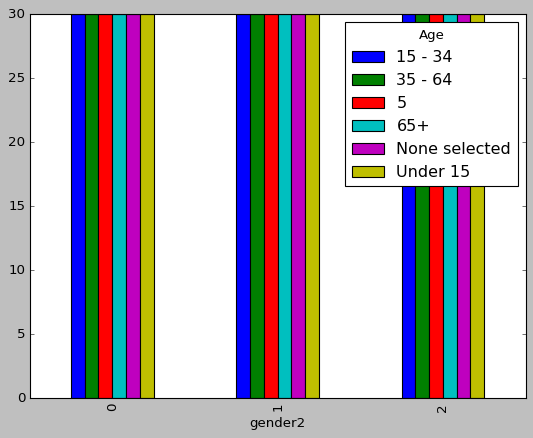

In [308]:
gender_age.plot(kind='bar');

In [309]:
gender_age2 = pd.crosstab(df['gender2'],df['Age'], normalize='columns')
gender_age2

Age,15 - 34,35 - 64,5,65+,None selected,Under 15
gender2,,,,,,
0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
1,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
2,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


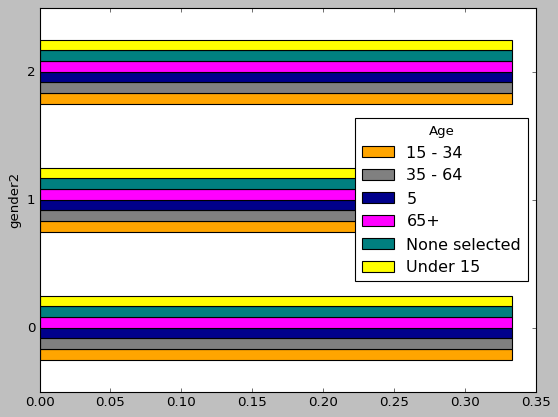

In [310]:
gender_age2.plot(kind='barh', color=['orange', 'gray','darkblue', 'magenta', 'teal','yellow']);

In [311]:
df['Deaths'].mean()

995.5185185185185

In [312]:
deathage=df.groupby('Deaths')['age2'].mean()
deathage

Deaths
0        1.918919
1        2.181818
2        3.040000
3        2.421053
4        2.181818
           ...   
18517    0.000000
21058    0.000000
22079    0.000000
28783    0.000000
33599    0.000000
Name: age2, Length: 244, dtype: float64

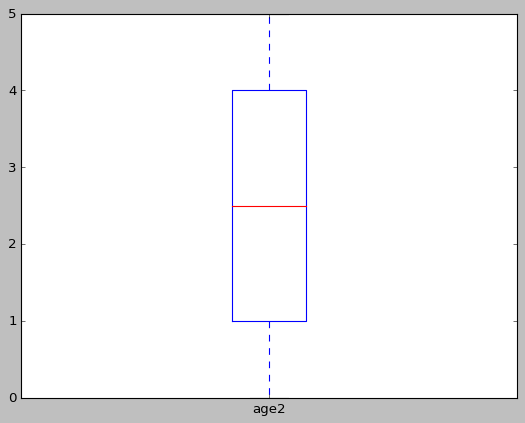

In [313]:
df['age2'].plot(kind='box');

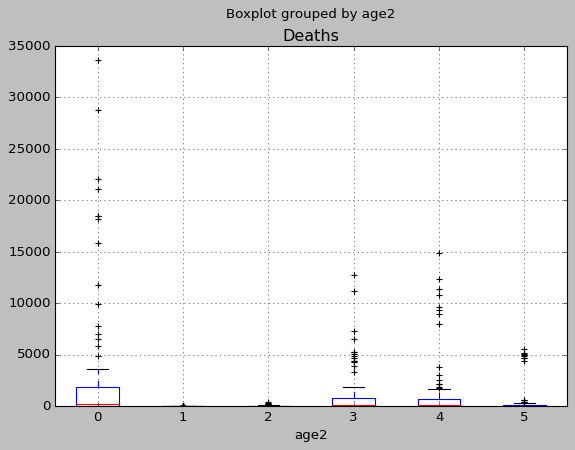

In [314]:
df.boxplot(column='Deaths', by='age2');

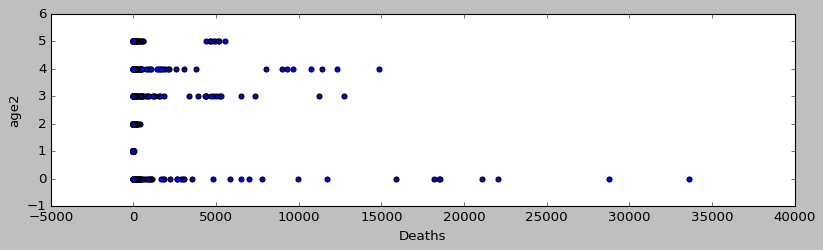

In [315]:
df.plot(kind='scatter', x='Deaths', y='age2', figsize=(12,3));

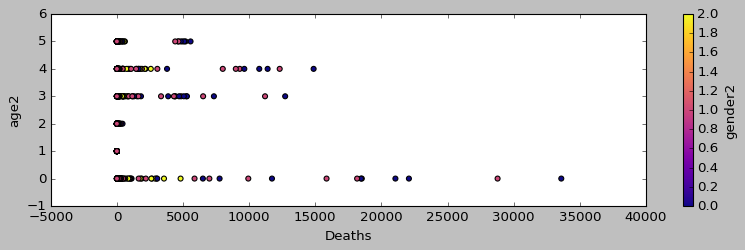

In [316]:
df.plot(kind='scatter', x='Deaths', y='age2',c='gender2',colormap='plasma', figsize=(12,3));

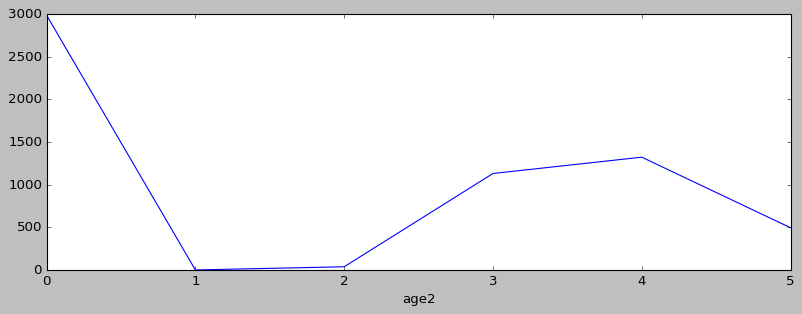

In [317]:
df.groupby('age2')['Deaths'].mean().plot(figsize=(12,4));

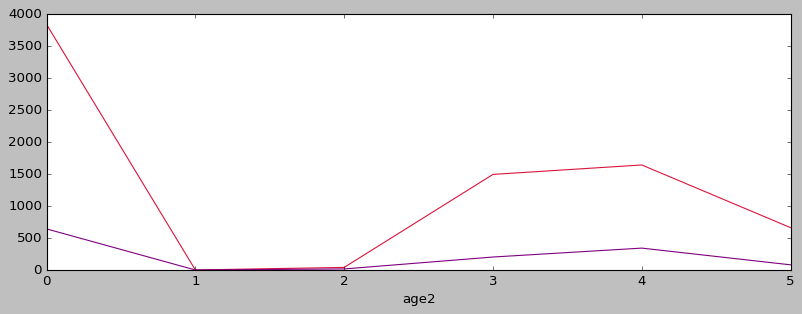

In [318]:
colors=['crimson','purple','dodgerblue','teal','magenta']
for x in [1,2,3,4,5]:
  df[df['gender2']==x].groupby('age2')['Deaths'].mean().plot(figsize=(12,4), color=colors[x-1]);

In [319]:
df.corr()

,Unnamed: 0,Deaths,Population,Rate,age2,gender2
Unnamed: 0,1.000000,-0.290805,-0.061254,-0.333086,0.028172,0.094281
Deaths,-0.290805,1.000000,0.593052,0.470143,-0.108778,-0.157320
Population,-0.061254,0.593052,1.000000,0.073197,-0.231655,-0.156968
Rate,-0.333086,0.470143,0.073197,1.000000,0.027170,-0.126733
age2,0.028172,-0.108778,-0.231655,0.027170,1.000000,0.000000
gender2,0.094281,-0.157320,-0.156968,-0.126733,0.000000,1.000000


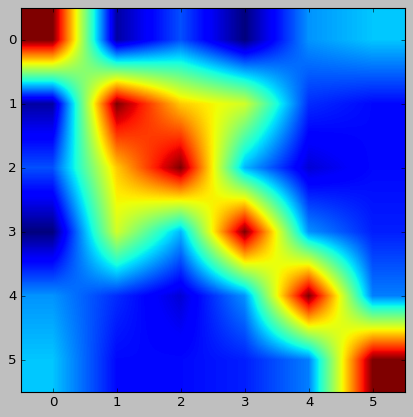

In [320]:
plt.imshow(df.corr());

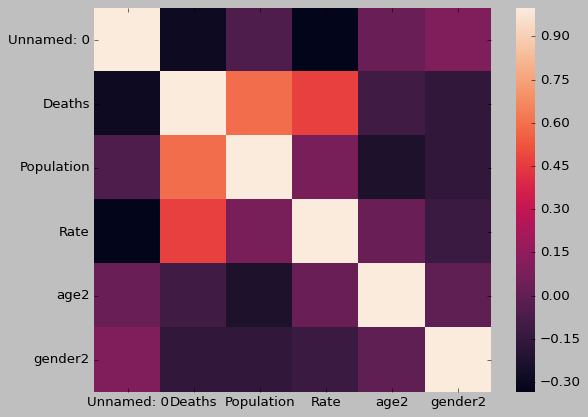

In [321]:
sns.heatmap(df.corr());

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here